  Patient_ID  Age  Gender Nationality        Emirate Diagnosis_Date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  Cancer_Type Cancer_Stage Treatment_Type Treatment_Start_Date  \
0       Liver           II      Radiation           2020-12-04   
1    Leukemia          III        Surgery           2015-11-05   
2       Liver          III      Radiation           2018-08-03   
3        Lung          III      Radiation           2022-03-13   
4  Pancreatic           II   Chemotherapy           2020-02-29   

                     Hospital Primary_Physician          Outcome Death_Date  \
0     Sheikh Khalifa Hospital          Dr. VO41        Recovered        NaN   
1              Dub

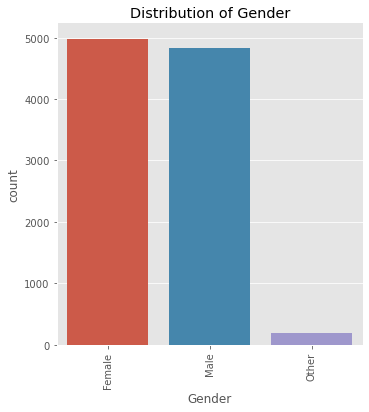

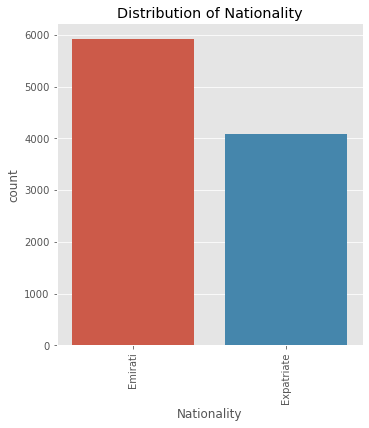

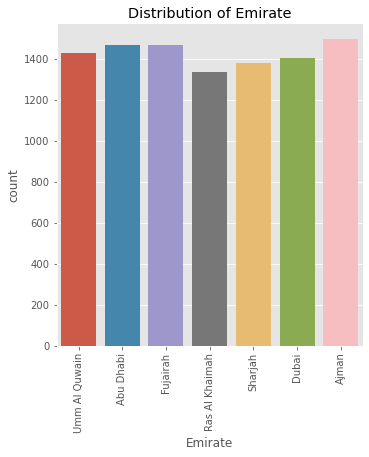

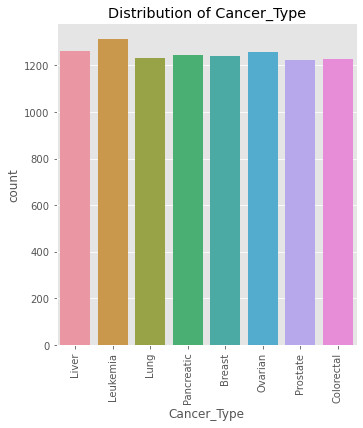

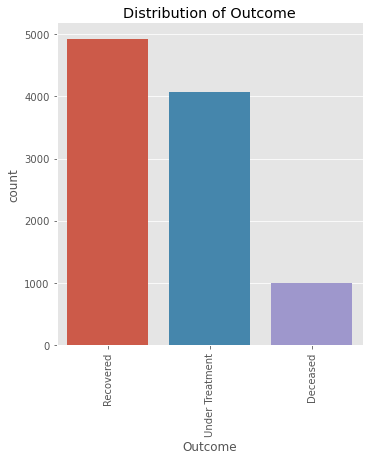

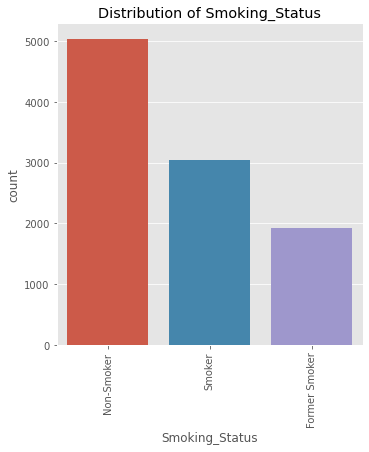

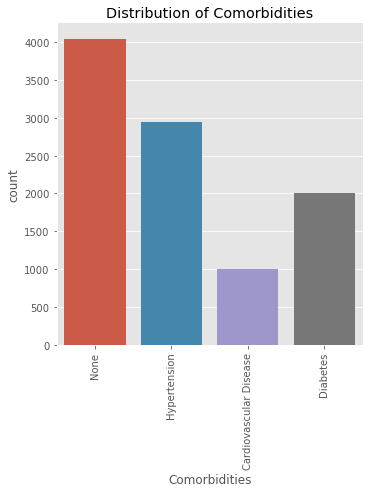

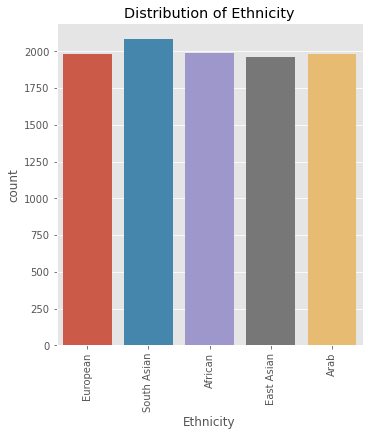

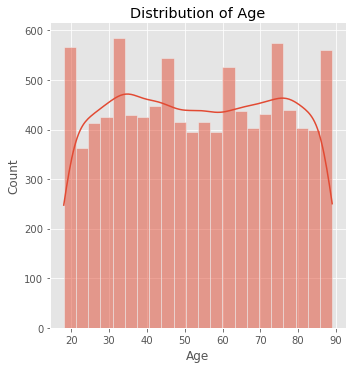

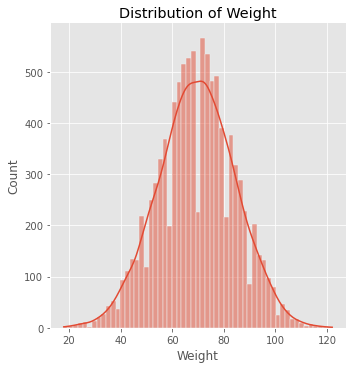

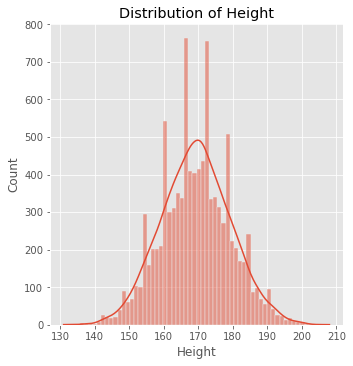

Skewness of Age: 0.003845595965890207


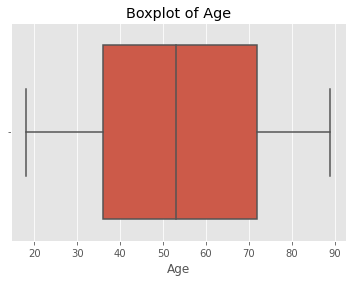

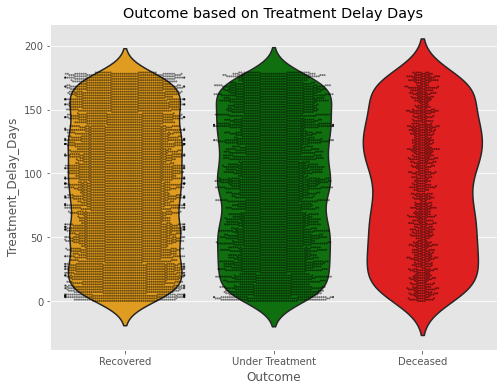

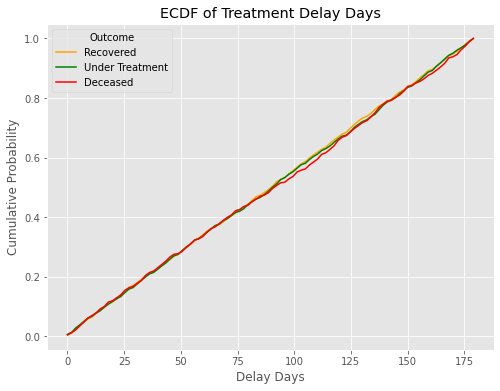

<Figure size 576x432 with 0 Axes>

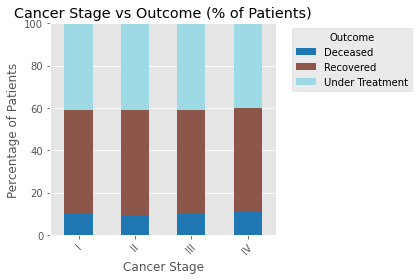

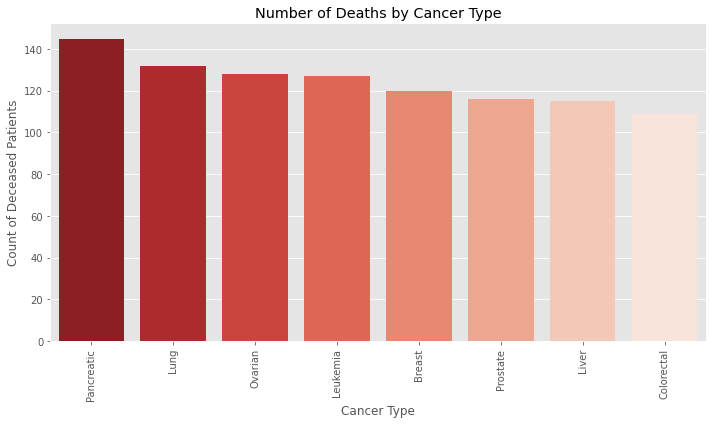

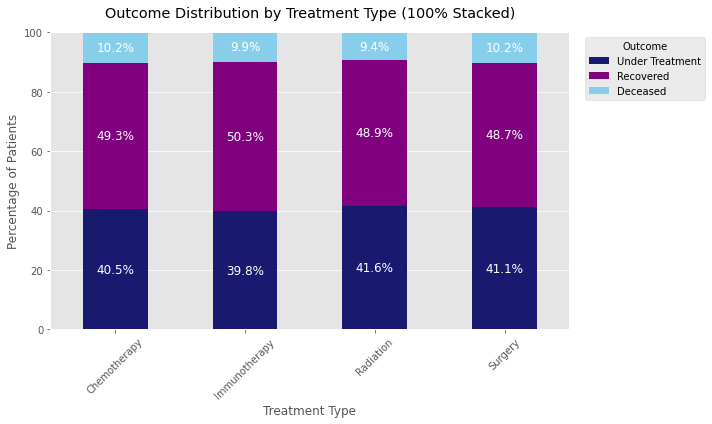

In [2]:

# ==========================
# Step 0: Import Libraries
# ==========================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

# Plotting Settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)
%matplotlib inline
warnings.filterwarnings('ignore', message='Dataset has 0 variance; skipping density estimate')

# ==========================
# Step 1: Load and Inspect Data
# ==========================

# Load Data
cancer_df = pd.read_csv(r'C:\Users\Admin\Desktop\Data Analysis\End-to-End Project\Cancer Patient Project\_cancer_dataset_uae.csv')

# Basic Exploration
print(cancer_df.head())
print('Shape of dataset:', cancer_df.shape)
print(cancer_df.info())
print(cancer_df.isna().sum())

# Check duplicates
print('Number of duplicate rows:', cancer_df.duplicated().sum())

# ==========================
# Step 2: Data Cleaning
# ==========================

# Convert date columns to datetime
cancer_df['Diagnosis_Date'] = pd.to_datetime(cancer_df['Diagnosis_Date'], errors='coerce')
cancer_df['Treatment_Start_Date'] = pd.to_datetime(cancer_df['Treatment_Start_Date'], errors='coerce')

# ==========================
# Step 3: Feature Engineering
# ==========================

# Create Age Categories
q25 = cancer_df['Age'].quantile(0.25)
q50 = cancer_df['Age'].median()
q75 = cancer_df['Age'].quantile(0.75)
max_age = cancer_df['Age'].max()

bins = [0, q25, q50, q75, max_age]
labels = ['young_adult', 'middle_age', 'older_adult', 'elderlies']
cancer_df['Age_cat'] = pd.cut(cancer_df['Age'], bins=bins, labels=labels)

# Calculate Treatment Delay and BMI
cancer_df['Treatment_Delay_Days'] = (cancer_df['Treatment_Start_Date'] - cancer_df['Diagnosis_Date']).dt.days
cancer_df['BMI'] = cancer_df['Weight'] / ((cancer_df['Height'] / 100) ** 2)

# ==========================
# Step 4: Exploratory Data Analysis (EDA)
# ==========================

# 4.1 Distribution of Categorical Features
column_list = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Outcome', 'Smoking_Status', 'Comorbidities', 'Ethnicity']

def plot_categorical_columns():
    for col in column_list:
        g = sns.catplot(x=col, data=cancer_df, kind='count')
        g.set_xticklabels(rotation=90)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_categorical_columns()

# 4.2 Distribution of Numerical Features
num_cols = ['Age', 'Weight', 'Height']

def plot_numerical_columns():
    for col in num_cols:
        sns.displot(cancer_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_numerical_columns()

# 4.3 Skewness and Outliers
print('Skewness of Age:', cancer_df['Age'].skew())
sns.boxplot(x=cancer_df['Age'])
plt.title('Boxplot of Age')
plt.show()

